## Challenge: “Can we predict emotional sentiment from brainwave readings?”


https://medium.freecodecamp.org/multi-class-classification-with-sci-kit-learn-xgboost-a-case-study-using-brainwave-data-363d7fca5f69

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


df = pd.read_csv("emotions.csv")
df.head(5)

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


There are 2549 columns in the dataset and ‘label’ is the target column for our classification problem. All other columns like ‘mean_d_1_a’, ‘mean_d2_a’ etc are describing features of brainwave signal readings. Columns starting with the ‘fft’ prefix are most probably ‘Fast Fourier transforms’ of original signals. Our target column ‘label’ describes the degree of emotional sentiment.

In [3]:
df.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


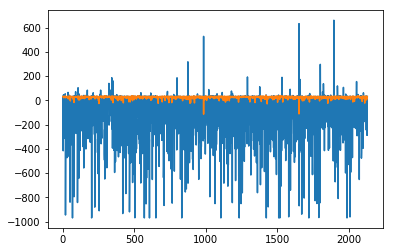

In [4]:
#Visualizing some of the data:
df['mean_2_a'].plot()
df['mean_1_a'].plot()

### Let’s first understand class distributions from column ‘label’:

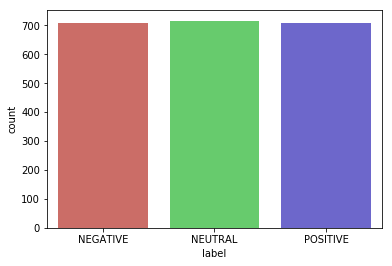

In [ ]:
import seaborn as sns

sns.countplot(x='label', data=df, palette='hls') #this is much faster than the hist() command in matplotlib

### From the bar chart:

it is clear that class distribution is not skewed and it is a ‘multi-class classification’ problem with target variable ‘label’. We will try with different classifiers and see the accuracy levels.

Before applying any classifier, the column ‘label’ should be separated out from other feature columns (‘mean_d_1_a’, ‘mean_d2_a’ etc are features).

In [ ]:
label_df = df['label']

df.drop('label', axis=1, inplace=True)
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,74.3,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,130.0,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,-534.0,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,-183.0,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,114.0,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60


### As it is a ‘classification’ problem, we will follow the below conventions for each ‘classifier’ to be tried:

1. We will use a ‘cross validation’ (in our case will use 10 fold cross validation) approach over the dataset and take average accuracy. This will give us a holistic view of the classifier’s accuracy.


2. We will use a ‘Pipeline’ based approach to combine all pre-processing and main classifier computation. A ML ‘Pipeline’ wraps all processing stages in a single unit and act as a ‘classifier’ itself. By this, all stages become re-usable and can be put in forming other ‘pipelines’ also.



3. We will track total time in building & testing for each approach. We will call this ‘time taken’.



For the above, we will primarily use the scikit-learn package from Python. As the number of features here is quite high, will start with a classifier which works well on high-dimensional data.

## RandomForest Classifier


‘RandomForest’ is a tree & bagging approach-based ensemble classifier. It will automatically reduce the number of features by its probabilistic entropy calculation approach. Let’s see that:

In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split


pl_random_forest = Pipeline(steps=[('random_forest', RandomForestClassifier())])

scores = cross_val_score(pl_random_forest, df, label_df, cv=10, scoring='accuracy')

print('Accuracy for RandomForest : ', scores.mean())

/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Ganesh/anaconda3/lib/python3.7/si

Accuracy for RandomForest :  0.9845242187352161
CPU times: user 4.39 s, sys: 291 ms, total: 4.68 s
Wall time: 5.33 s


Accuracy is very good at 97.7% and ‘total time taken’ is quite short (3.79 seconds only).


For this classifier, no pre-processing stages like scaling or noise removal are required, as it is completely probability-based and not at all affected by scale factors.

## Logistic Regression Classifier


‘Logistic Regression’ is a linear classifier and works in same way as linear regression.

In [ ]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pl_log_reg = Pipeline(steps = [('scalar', StandardScaler()), 
                            ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])

scores = cross_val_score(pl_log_reg, df, label_df, cv=10,scoring='accuracy')

print('Accuracy for Logistic Regression: ', scores.mean())


/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_ite

Accuracy for Logistic Regression:  0.9324451470304753
CPU times: user 3min 17s, sys: 1.99 s, total: 3min 19s
Wall time: 3min 28s


/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


We can see accuracy (93.19%) is lower than ‘RandomForest’ and ‘time taken’ is higher (3 min 8s).


‘Logistic Regression’ is heavily affected by different value ranges across dependent variables, thus forces ‘feature scaling’. That’s why ‘StandardScaler’ from scikit-learn has been added as a preprocessing stage. It automatically scales features according to a Gaussian Distribution with zero mean & unit variance, and thus values for all variables range from -1 to +1.



The reason for high time taken is high-dimensionality and scaling time required. There are 2549 variables in the dataset and the coefficient of each one should be optimised as per the Logistic Regression process. Also, there is a question of multi-co-linearity. This means linearly co-related variables should be grouped together instead of considering them separately.



The presence of multi-col-linearity affects accuracy. So now the question becomes, “Can we reduce the number of variables, reduce multi-co-linearity, & improve ‘time taken?”

## Principal Component Analysis


PCA can transform original low level variables to a higher dimensional space and thus reduce the number of required variables. All co-linear variables get clubbed together. 


Let’s do a PCA of the data and see what are the main PC’s:

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scaled_df = scaler.fit_transform(df)

pca = PCA(n_components = 20) #gives 20 principal components

pca_vectors = pca.fit_transform(scaled_df)

for index, var in enumerate(pca.explained_variance_ratio_):
    print("Explained Variance ratio by Principal Component ", (index+1), " : ", var)

Explained Variance ratio by Principal Component  1  :  0.3677256411753875
Explained Variance ratio by Principal Component  2  :  0.0955389425723261
Explained Variance ratio by Principal Component  3  :  0.0843606900048249
Explained Variance ratio by Principal Component  4  :  0.060856651819701645
Explained Variance ratio by Principal Component  5  :  0.047453732926251595
Explained Variance ratio by Principal Component  6  :  0.03082305251847155
Explained Variance ratio by Principal Component  7  :  0.02472162086092129
Explained Variance ratio by Principal Component  8  :  0.013753055070757633
Explained Variance ratio by Principal Component  9  :  0.012408702721171411
Explained Variance ratio by Principal Component  10  :  0.012103653572076135
Explained Variance ratio by Principal Component  11  :  0.009557100575058835
Explained Variance ratio by Principal Component  12  :  0.0091643110139863
Explained Variance ratio by Principal Component  13  :  0.008740057332093579
Explained Variance

We mapped 2549 variables to 20 Principal Components. 


From the above result, it is clear that first 10 PCs are a matter of importance. The total percentage of the explained variance ratio by the first 10 PCs is around 0.737 (0.36 + 0.095 + ..+ 0.012). Or it can be said that the first 10 PCs explain 73.7% variance of the entire dataset.



So, with this we are able to reduce 2549 variables to 10 variables. That’s a dramatic change, isn’t it? In theory, Principal Components are virtual variables generated from mathematical mapping. From a business angle, it is not possible to tell which physical aspect of the data is covered by them. That means, physically, that Principal Components don’t exist. But, we can easily use these PCs as quantitative input variables to any ML algorithm and get very good results.



For visualisation, let’s take the first two PCs and see how can we distinguish different classes of the data using a ‘scatterplot’.

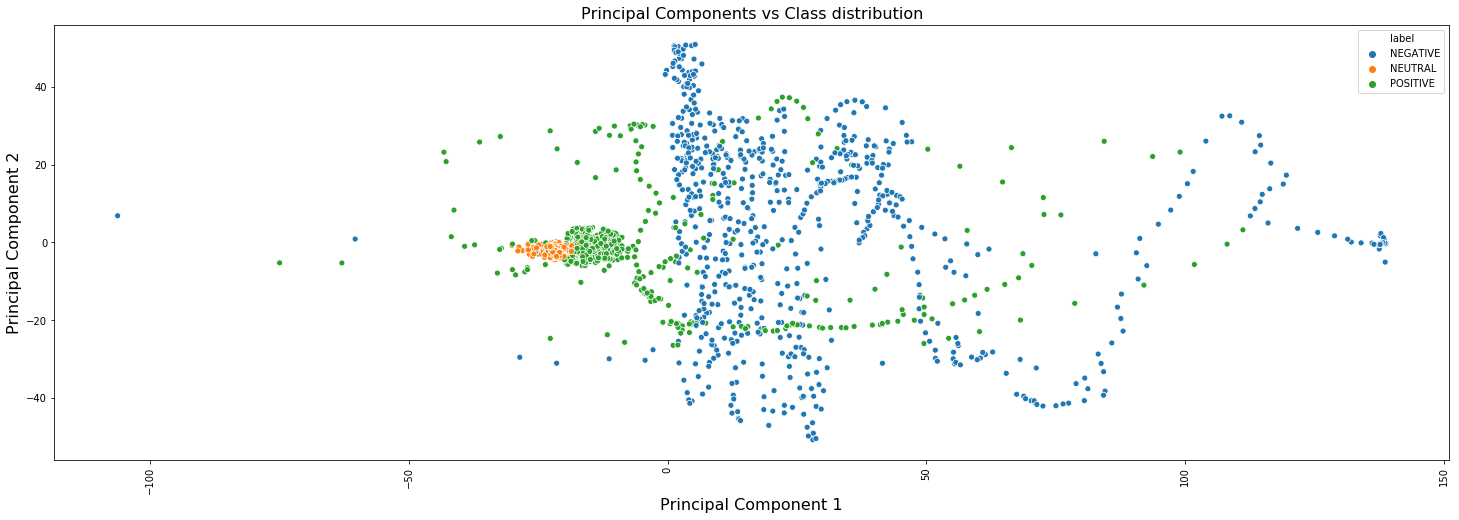

In [ ]:
plt.figure(figsize=(25,8))

sns.scatterplot(x=pca_vectors[:, 0], y=pca_vectors[:, 1], hue=label_df)

plt.title('Principal Components vs Class distribution', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=16)
plt.xticks(rotation='vertical');

In the above plot, three classes are shown in different colours. So, if we use the same ‘Logistic Regression’ classifier with these two PCs, then from the above plot we can probably say that the first classifier will separate out ‘NEUTRAL’ cases from other two cases and the second classifier will separate out ‘POSITIVE’ & ‘NEGATIVE’ cases (as there will be two internal logistic classifiers for 3-class problem). Let’s try and see the accuracy.

In [ ]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pl_log_reg_pca = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pca', PCA(n_components = 2)),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])

scores = cross_val_score(pl_log_reg_pca, df, label_df, cv=10,scoring='accuracy')

print('Accuracy for Logistic Regression with 2 Principal Components: ', scores.mean())

/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_ite

Accuracy for Logistic Regression with 2 Principal Components:  0.7752487834538495
CPU times: user 8.22 s, sys: 409 ms, total: 8.63 s
Wall time: 4.94 s


/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Time taken (7.74 s) was reduced but accuracy (77%) decreased.


Now, let’s take all 10 PCs and run:

In [ ]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pl_log_reg_pca_10 = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pca', PCA(n_components = 10)),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])

scores = cross_val_score(pl_log_reg_pca_10, df, label_df, cv=10,scoring='accuracy')

print('Accuracy for Logistic Regression with 10 Principal Components: ', scores.mean())

/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_ite

Accuracy for Logistic Regression with 10 Principal Components:  0.865842673825059
CPU times: user 9.72 s, sys: 296 ms, total: 10 s
Wall time: 5.99 s


/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## Artificial Neural Network Classifier (ANN)


An ANN classifier is non-linear with automatic feature engineering and dimensional reduction techniques. 


‘MLPClassifier’ in scikit-learn works as an ANN. But here also, basic scaling is required for the data. Let’s see how it works:

In [ ]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

pl_mlp = Pipeline(steps=[('scaler',StandardScaler()),
                             ('mlp_ann', MLPClassifier(hidden_layer_sizes=(1275, 637)))])
scores = cross_val_score(pl_mlp, df, label_df, cv=10,scoring='accuracy')
print('Accuracy for ANN : ', scores.mean())

Accuracy for ANN :  0.9709241155099679
CPU times: user 18min 25s, sys: 1min 29s, total: 19min 54s
Wall time: 12min 53s


Accuracy (97.5%) is very good, though running time is high (12 min).


The reason for high ‘time taken’ is the rigorous training time required for neural networks, and that too with a high number of dimensions.


It is a general convention to start with a hidden layer size of 50% of the total data size and subsequent layers will be 50% of the previous one. In our case these are (1275 = 2549 / 2, 637 = 1275 / 2). The number of hidden layers can be taken as hyper-parameter and can be tuned for better accuracy. In our case it is 2.

## Linear Support Vector Machines Classifier (SVM)


We will now apply ‘Linear SVM’ on the data and see how accuracy is coming along. Here also scaling is required as a preprocessing stage.

In [ ]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

pl_svm = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pl_svm', LinearSVC())])

scores = cross_val_score(pl_svm, df, label_df, cv=10,scoring='accuracy')

print('Accuracy for Linear SVM : ', scores.mean())

/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

Accuracy for Linear SVM :  0.9643467083227542
CPU times: user 1min 23s, sys: 1.34 s, total: 1min 25s
Wall time: 1min 26s


/Users/Ganesh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy is coming in at 96.4% which is little less than ‘RandomForest’ or ‘ANN’. ‘time taken’ is 1 min 23 s which is in far better than ‘ANN’.

## Extreme Gradient Boosting Classifier (XGBoost)


XGBoost is a boosted tree based ensemble classifier. Like ‘RandomForest’, it will also automatically reduce the feature set. For this we have to use a separate ‘xgboost’ library which does not come with scikit-learn. Let’s see how it works:

In [ ]:
%%time

import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split

pl_xgb = Pipeline(steps=
                  [('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])

scores = cross_val_score(pl_xgb, df, label_df, cv=10)

print('Accuracy for XGBoost Classifier : ', scores.mean())